In [ ]:
from keras.utils import to_categorical
from tensorflow.keras.utils import load_img
from keras.models import Sequential
from keras .layers import Dense , Conv2D ,Dropout,Flatten,MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
train_dir ='images/train'
test_dir ='images/test'


In [3]:
def createdataframe(dir):
   image_paths=[]
   labels=[]
   for label in os.listdir(dir):
     for imagename in os.listdir(os.path.join(dir,label)):
         image_paths.append(os.path.join(dir,label,imagename))
         labels.append(label)
     print(label,"completed")
   return image_paths,labels

In [4]:
train=pd.DataFrame()
train['images'],train['label']=createdataframe(train_dir)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                            images     label
0         images/train\angry\Training_10118481.jpg     angry
1         images/train\angry\Training_10120469.jpg     angry
2         images/train\angry\Training_10131352.jpg     angry
3         images/train\angry\Training_10161559.jpg     angry
4          images/train\angry\Training_1021836.jpg     angry
...                                            ...       ...
28704  images/train\surprise\Training_99916297.jpg  surprise
28705  images/train\surprise\Training_99924420.jpg  surprise
28706  images/train\surprise\Training_99937001.jpg  surprise
28707  images/train\surprise\Training_99951755.jpg  surprise
28708  images/train\surprise\Training_99984132.jpg  surprise

[28709 rows x 2 columns]


In [6]:
test=pd.DataFrame()
test['images'],test['label']=createdataframe(test_dir)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)

                                            images     label
0       images/test\angry\PrivateTest_10131363.jpg     angry
1       images/test\angry\PrivateTest_10304478.jpg     angry
2        images/test\angry\PrivateTest_1054527.jpg     angry
3       images/test\angry\PrivateTest_10590091.jpg     angry
4        images/test\angry\PrivateTest_1109992.jpg     angry
...                                            ...       ...
7173  images/test\surprise\PublicTest_98089595.jpg  surprise
7174  images/test\surprise\PublicTest_98567249.jpg  surprise
7175  images/test\surprise\PublicTest_98972870.jpg  surprise
7176  images/test\surprise\PublicTest_99242645.jpg  surprise
7177  images/test\surprise\PublicTest_99446963.jpg  surprise

[7178 rows x 2 columns]


In [8]:
!pip install tqdm

from tqdm import tqdm


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
def extract_features(images):
    features=[]
    for image in tqdm(images):
        #img=load_img(image,grayscale= True)
        img = load_img(image, color_mode='grayscale')

        img=np.array(img)
        features.append(img)
    features=np.array(features)
    features=features.reshape(len(features),48,48,1)
    return features

In [10]:
print(train.columns)

Index(['images', 'label'], dtype='object')


In [11]:
train_features=extract_features(train['images'])

100%|██████████████████████████████████████████████████| 28709/28709 [04:25<00:00, 108.09it/s]


In [12]:
test_features=extract_features(test['images'])
print("hello")

100%|████████████████████████████████████████████████████| 7178/7178 [01:09<00:00, 103.98it/s]

hello


In [13]:
x_train=train_features/255.0
x_test=test_features/255.0

In [14]:
!pip install scikit-learn



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le=LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [17]:
y_train=le.transform(train['label'])
y_test=le.transform(test['label'])


In [18]:
y_train=to_categorical(y_train,num_classes=7)
y_test=to_categorical(y_test,num_classes=7)

In [19]:
img_size = 48

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 emotion classes
])


C:\Users\Lenovo\facial_expression_recognition\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
#x_train = extract_features(train['images'])  # or whatever your image column is
#x_test = extract_features(val['images'])


In [22]:


model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=25)


Epoch 1/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.2408 - loss: 1.8269 - val_accuracy: 0.3518 - val_loss: 1.6141
Epoch 2/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.3770 - loss: 1.5992 - val_accuracy: 0.4684 - val_loss: 1.4169
Epoch 3/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.4456 - loss: 1.4470 - val_accuracy: 0.4802 - val_loss: 1.3513
Epoch 4/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.4761 - loss: 1.3666 - val_accuracy: 0.4951 - val_loss: 1.3040
Epoch 5/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.5091 - loss: 1.2946 - val_accuracy: 0.5309 - val_loss: 1.2444
Epoch 6/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 28s 32ms/step - accuracy: 0.5216 - loss: 1.2534 - val_accuracy: 0.5256 - val_loss: 1.2374
Epoch 7/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 1161s 1s/step - accuracy: 0.5342 - loss: 1.2233 - val_accuracy: 0.5336 - val_loss: 1.2103
Epoch 8/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 31s 35ms/step - accuracy: 0.5458 - loss: 1.1869 - 

In [24]:
model_json=model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [31]:
from keras.models import model_from_json,Sequential

In [33]:
from keras.models import model_from_json, Sequential

with open("facialemotionmodel.json", "r") as json_file:
    model_json = json_file.read()

# Manually map 'Sequential' class using custom_objects
model = model_from_json(model_json, custom_objects={'Sequential': Sequential})
model.load_weights("facialemotionmodel.h5")

print("Model loaded successfully!")


Model loaded successfully!


In [34]:
label=['angry','disgust','fear','happy','neutarl','sad','surprise']

In [63]:
def ef(image):
   # img=load_img(image,grayscale = True)
    img=load_img(image,color_mode='grayscale')

    feature=np.array(img)
    feature.reshape(1,48,48,1)
    return feature/255.0

In [72]:
import cv2
import numpy as np

def ef(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (48, 48))            # Resize to 48x48
    img = img.astype('float32') / 255.0        # Normalize to [0,1]
    img = np.expand_dims(img, axis=-1)         # Add channel dimension -> (48, 48, 1)
    img = np.expand_dims(img, axis=0)          # Add batch dimension -> (1, 48, 48, 1)
    return img


In [79]:
image='images/train/angry/Training_143373.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)


original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
model prediction is  angry


In [76]:
def ef(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        print(f"Error: Could not load image from path: {image_path}")
        return None
    
    img = cv2.resize(img, (48, 48))            # Resize to 48x48
    img = img.astype('float32') / 255.0        # Normalize to [0,1]
    img = np.expand_dims(img, axis=-1)         # Add channel dimension -> (48, 48, 1)
    img = np.expand_dims(img, axis=0)          # Add batch dimension -> (1, 48, 48, 1)
    return img


In [81]:
image='images/train/sad/Training_23814.jpg'

print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)


original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
model prediction is  sad


In [82]:
import matplotlib.pyplot as plt
%matplotlib inline


original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
model prediction is  fear


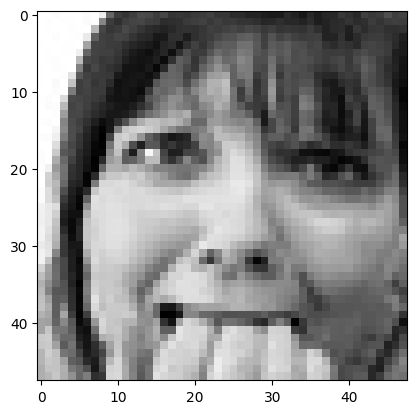

In [84]:
image = 'images/train/fear/Training_266022.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
model prediction is  angry


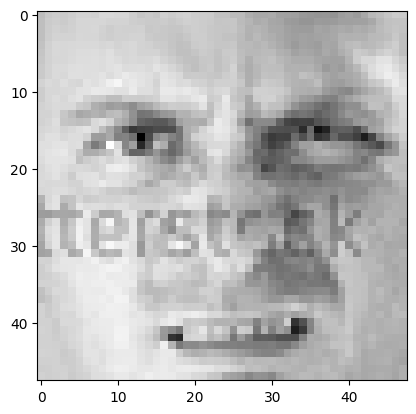

In [85]:
image = 'images/train/disgust/Training_3566649.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
model prediction is  happy


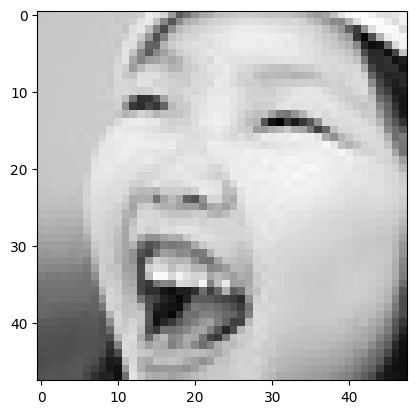

In [86]:
image = 'images/train/happy/Training_50580.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
model prediction is  surprise


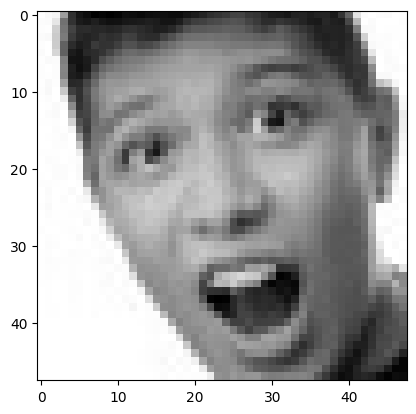

In [87]:
image = 'images/train/surprise/Training_220550.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [91]:
# Get model predictions on X_test
predictions = model.predict(x_test)

# Convert predictions to class labels
y_pred = [label[np.argmax(p)] for p in predictions]

# True labels
# If y_test is one-hot encoded
y_true = [label[np.argmax(i)] for i in y_test]


225/225 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step


Accuracy: 0.7164948453608248


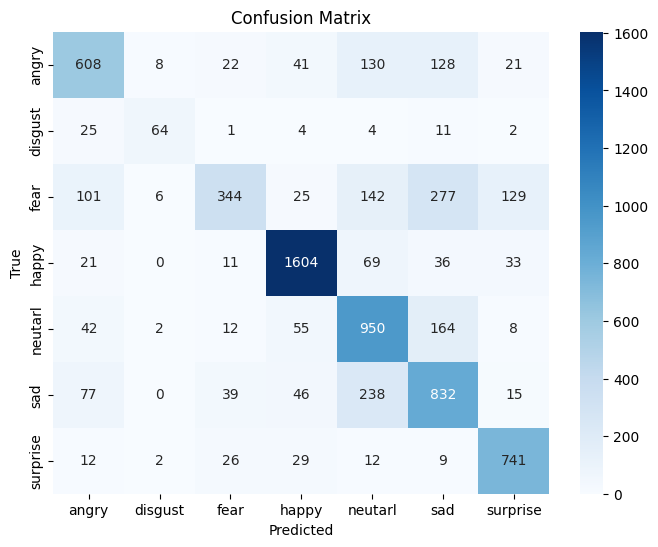

In [94]:
#EXTRA COLUMN
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_true, y_pred, labels=label)  # use the same label list you used in prediction
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label, yticklabels=label, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()